# SALES DATA ANALYSIS REPORT
## Introduction

This analysis examines the sales dataset to understand overall sales performance, identify which stores and products contribute the most, observe changes in sales over time, and detect unusual transaction values that may affect the analysis results.

The analysis includes:
-Data Wrangling (data cleaning and preparation)
-Creation of multiple DataFrames as needed for analysis
-Exploratory Data Analysis (EDA)
-Extraction of key insights from the sales data

# 1️. What is the total overall sales?

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import zscore

df = pd.read_csv("sales.csv")

# Ubah kolom date jadi datetime
df['date'] = pd.to_datetime(df['date'], format='%d/%m/%Y')

total_sales = df['sales'].sum()
print("Total penjualan:", total_sales)

Total penjualan: 698812.3300000001


## Insight:
The total sales value shows the overall revenue generated during the observed period. This number reflects the general scale of business performance and indicates whether sales activity is relatively high or low across all transactions.

# 2️. Which store has the highest sales?

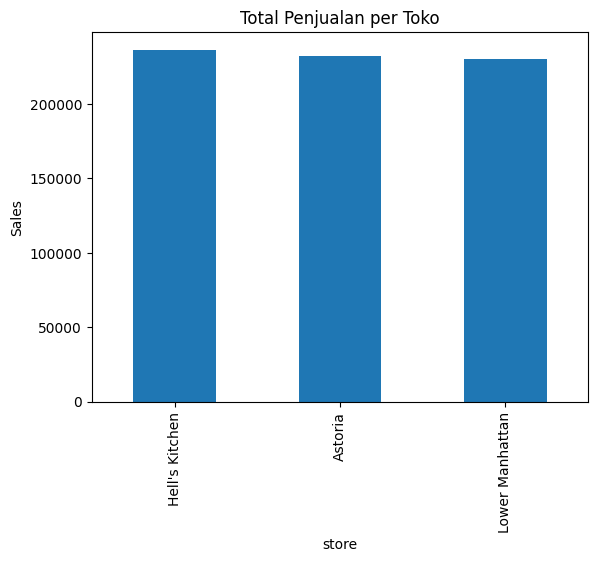

store
Hell's Kitchen     236511.17
Astoria            232243.91
Lower Manhattan    230057.25
Name: sales, dtype: float64


In [2]:
sales_per_store = df.groupby('store')['sales'].sum().sort_values(ascending=False)

sales_per_store.plot(kind='bar')
plt.title("Total Penjualan per Toko")
plt.ylabel("Sales")
plt.show()

print(sales_per_store)

## Insight:
One store contributes more revenue than the others, suggesting stronger performance at that location. This may be influenced by factors such as customer traffic, store size, or location advantages.

# 3️.Which product is sold the most?

In [3]:
top_product = df.groupby('product')['quantity'].sum().sort_values(ascending=False)
print(top_product)

product
Brewed Chai tea          26250
Gourmet brewed coffee    25973
Barista Espresso         24943
Brewed Black tea         17462
Hot chocolate            17457
Brewed herbal tea        17328
Organic brewed coffee    13012
Drip coffee              12891
Premium brewed coffee    12431
Scone                    10465
Brewed Green tea          8697
Regular syrup             7606
Pastry                    6961
Biscotti                  5788
Sugar free syrup          2905
Housewares                 555
Chai tea                   443
Organic Beans              420
Premium Beans              406
Gourmet Beans              366
Espresso Beans             319
Herbal tea                 305
Black tea                  303
Drinking Chocolate         266
Clothing                   221
Organic Chocolate          221
House blend Beans          183
Green tea                  159
Green beans                134
Name: quantity, dtype: int64


## Insight:
The top-selling product indicates the item with the highest customer demand. This product likely plays an important role in driving overall sales and should be prioritized in inventory planning.

# 4️. How does sales change over time?

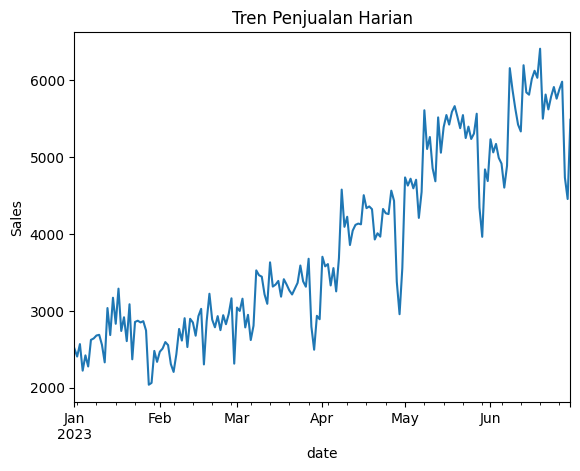

In [4]:
daily_sales = df.groupby('date')['sales'].sum()

daily_sales.plot()
plt.title("Tren Penjualan Harian")
plt.ylabel("Sales")
plt.show()

## Insight:
Sales fluctuate over time rather than remaining constant. Periods of higher sales may indicate peak demand, while lower periods could reflect reduced customer activity.

# 5️. What is the average sales value per transaction?

In [5]:
avg_sales = df['sales'].mean()
print("Rata-rata penjualan:", avg_sales)

Rata-rata penjualan: 4.6863671906435265


# 6️. Are there any unusual sales values (outliers) in the data?

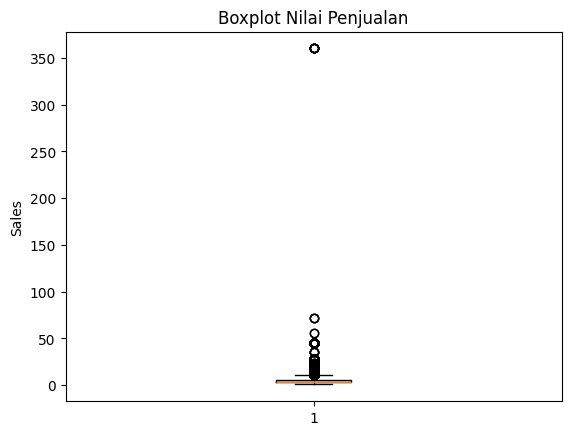

In [6]:
plt.boxplot(df['sales'])
plt.title('Boxplot Nilai Penjualan')
plt.ylabel('Sales')
plt.show()

## Insight:
The presence of outliers suggests that some transactions differ significantly from the majority. These could represent unusually large purchases or rare events that may distort overall statistics.

# 7️. How does the total sales change after removing outliers?

In [7]:
df['z_score'] = zscore(df['sales'])

outliers_z = df[abs(df['z_score']) > 3]
print("Jumlah outlier (Z-Score):", len(outliers_z))

# Hapus outlier
df_clean = df[abs(df['z_score']) <= 3]

new_total = df_clean['sales'].sum()
print("Total setelah hapus outlier:", new_total)

Jumlah outlier (Z-Score): 1545
Total setelah hapus outlier: 657792.8300000001


## Insight:
After removing extreme values, the total sales figure becomes more representative of normal business activity. This helps provide a clearer view of typical performance without being heavily influenced by rare transactions.

# Conclusion

Based on the analysis results, sales in the dataset show differences in contribution between stores and products, as well as changes in sales over time. Some products proved to be more popular, thus having a significant impact on total sales. In addition, unusual transaction values (outliers) were also found that could affect the analysis results. After the extreme data was removed, the sales pattern appeared more stable and better reflected normal sales conditions in general.